Use virtual environment's python interpreter to run the notebook


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: f'{x:.128f}')

In [2]:
df32 = pd.read_csv("data32.csv").astype(np.float128, errors='ignore')
df64 = pd.read_csv("data64.csv").astype(np.float128, errors='ignore')
dataNone = pd.read_csv("dataNone.csv").astype(np.float128, errors='ignore')

In [3]:
# Drop time_until_disrupt from df32, df64, and dataNone
df32 = df32.drop(columns=['time_until_disrupt'])
df64 = df64.drop(columns=['time_until_disrupt'])
dataNone = dataNone.drop(columns=['time_until_disrupt'])

### Differences between 64 and 32 casting precision

In [4]:
# Compute absolute differences
diff_abs = (df32.abs() - df64.abs()).abs()

# Get the maximum difference for each column
max_differences = diff_abs.max()

# Divide by the maximum value of each column in shot_data64
# max_differences = max_differences  

# Sort the differences in descending order and get the top 10
top_10_differences = max_differences.sort_values(ascending=False).head(10)

# Display the column names and their corresponding max differences
top_10_differences
# covert to  pd.DataFrame
top_10_differences_df = top_10_differences.reset_index()
top_10_differences_df.columns = ['column_name', 'max_difference']
top_10_differences_df

,column_name,max_difference
0,dn_dt,5693538828036341760.000000000000000000000000000...
1,n_e,35308598394880.00000000000000000000000000000000...
2,dprad_dt,3643.477287292480468750000000000000000000000000...
3,te_width_ece,2824.562162394207916804589331150054931640625000...
4,dip_dt,289.9192507266998291015625000000000000000000000...
5,dip_smoothed,179.9643965778523124754428863525390625000000000...
6,p_input,100.9918901151977479457855224609375000000000000...
7,p_oh,100.9918872395064681768417358398437500000000000...
8,dipprog_dt,7.265183150768280029296875000000000000000000000...
9,p_rad,1.878856986761093139648437500000000000000000000...


### Study te_widh_ece

In [5]:
# Drop 'shot' column from diff_abs
diff_abs = diff_abs.drop(columns=['shot'])
# Add 'shot' column back to diff_abs
diff_abs['shot'] = df32['shot']
# Order diff_abs by descending order in 'te_width_ece'
diff_abs_sorted_te_width_ece = diff_abs.sort_values(by='te_width_ece', ascending=False)
diff_abs_sorted_te_width_ece[['shot','te_width_ece']].head(10)

,shot,te_width_ece
16933,1160826029.000000000000000000000000000000000000...,2824.562162394207916804589331150054931640625000...
16927,1160826029.000000000000000000000000000000000000...,2746.275993071396442246623337268829345703125000...
16936,1160826029.000000000000000000000000000000000000...,2709.100089220148220192641019821166992187500000...
16930,1160826029.000000000000000000000000000000000000...,2500.096512217376584885641932487487792968750000...
7072,1090914006.000000000000000000000000000000000000...,1933.144812035826134888338856399059295654296875...
7052,1090914006.000000000000000000000000000000000000...,1819.997484328354175886488519608974456787109375...
3030,990225017.0000000000000000000000000000000000000...,752.8717451697925753251183778047561645507812500...
15919,1140625015.000000000000000000000000000000000000...,739.6552564295559477614006027579307556152343750...
3070,990225017.0000000000000000000000000000000000000...,564.0011267258149700865033082664012908935546875...
3551,1000511012.000000000000000000000000000000000000...,414.8874683852916405157884582877159118652343750...


In [6]:
# get shot list from diff_abs_sorted_te_width_ece
shot_list = diff_abs_sorted_te_width_ece['shot'].tolist()
# remove duplicates keeping the first occurrence
shot_list = list(dict.fromkeys(shot_list))

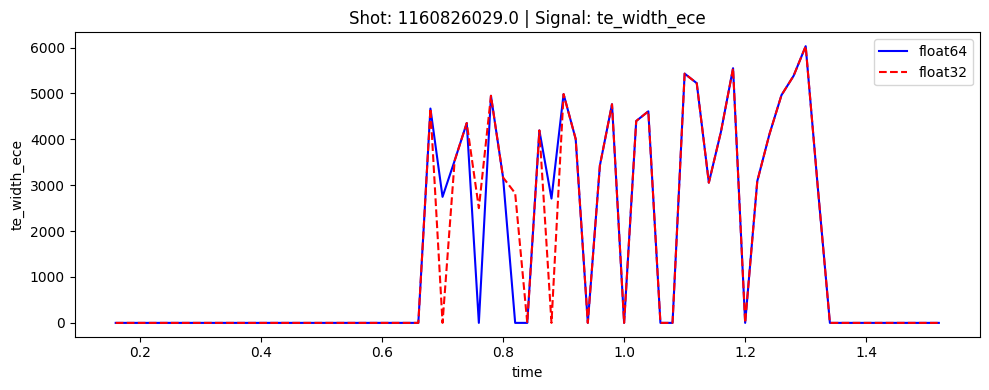

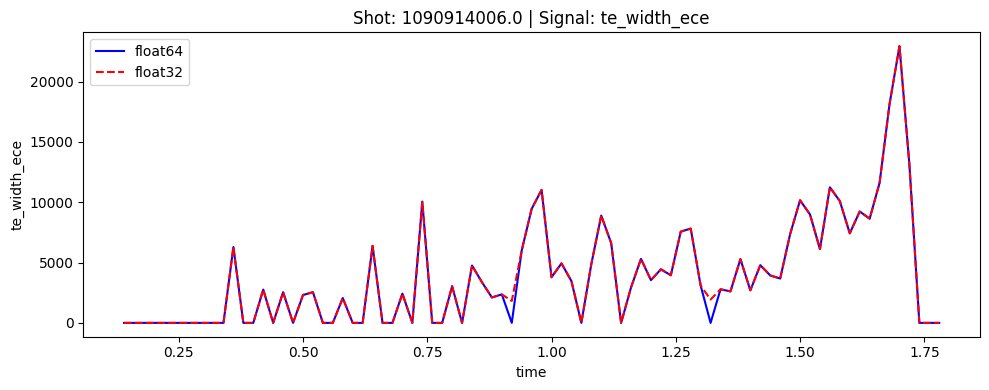

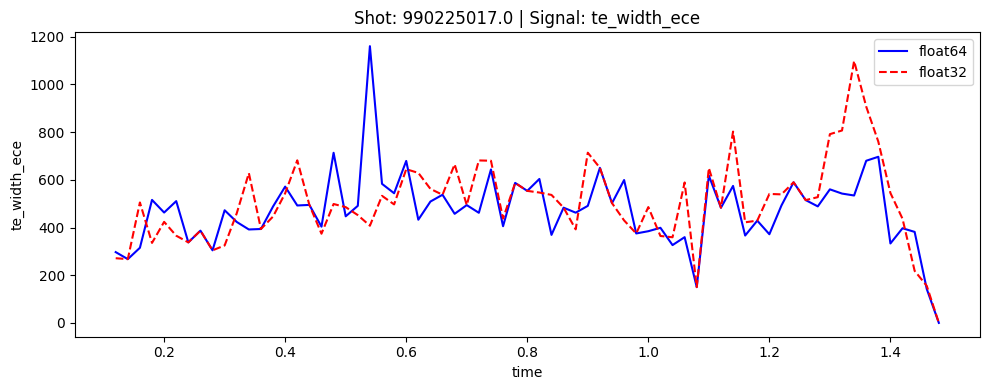

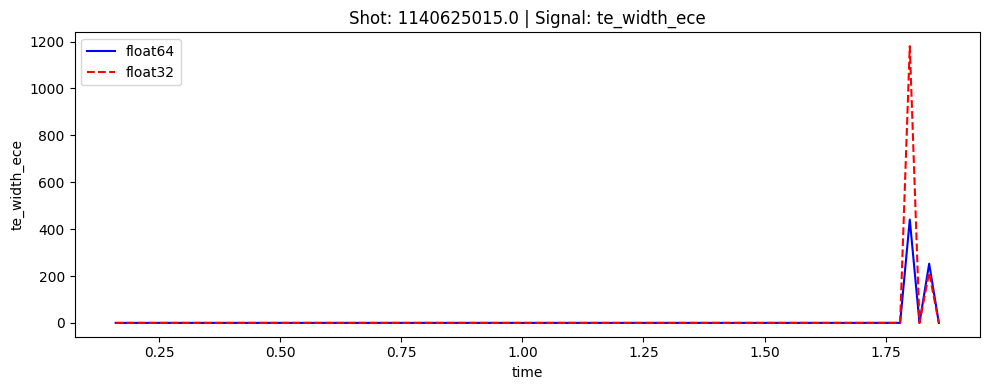

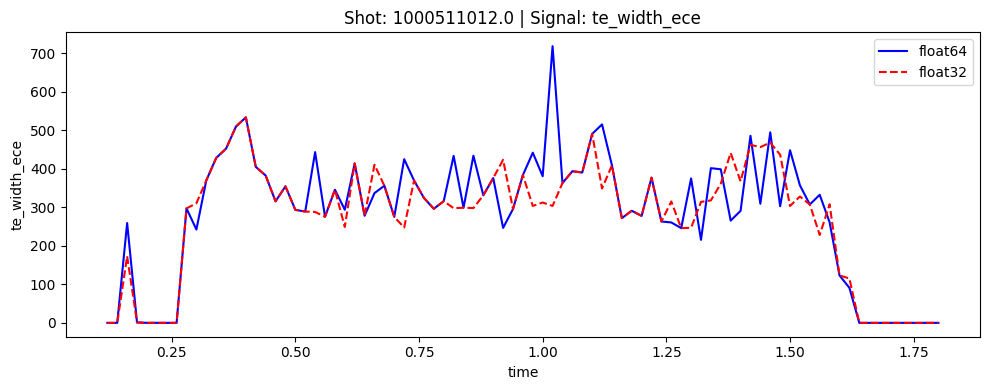

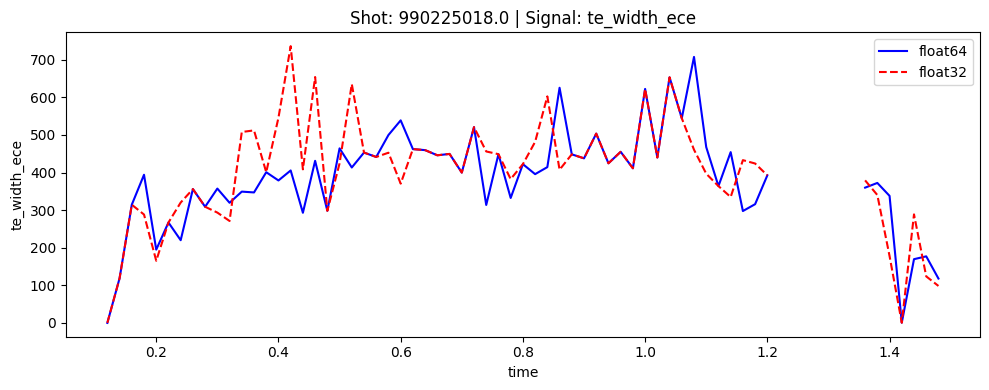

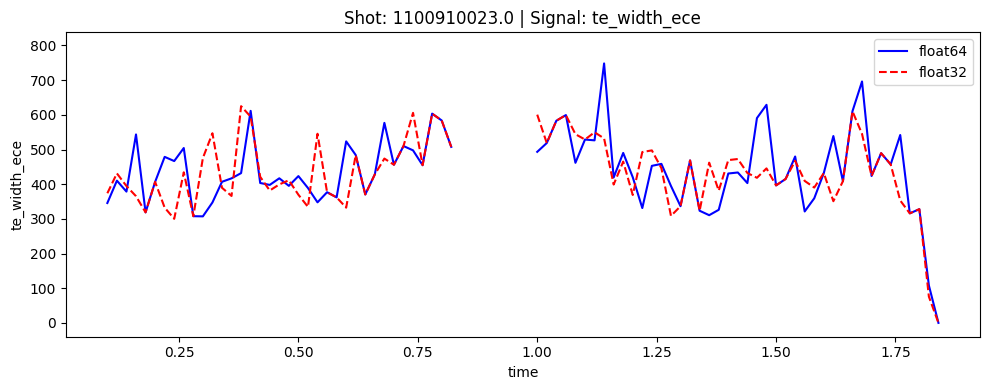

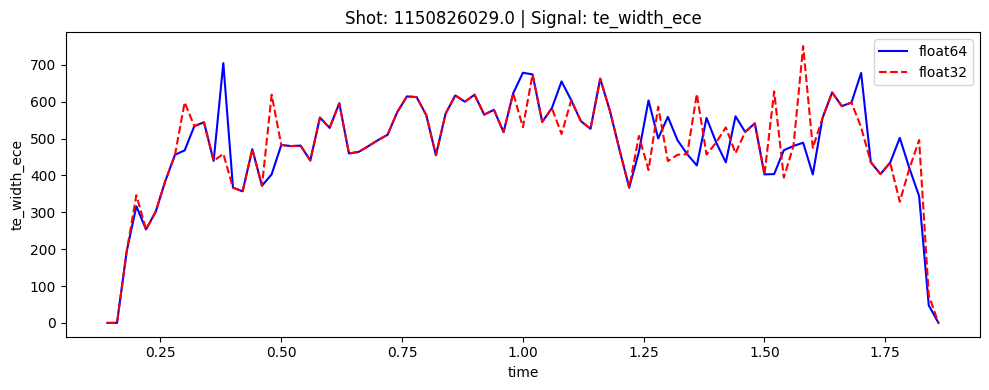

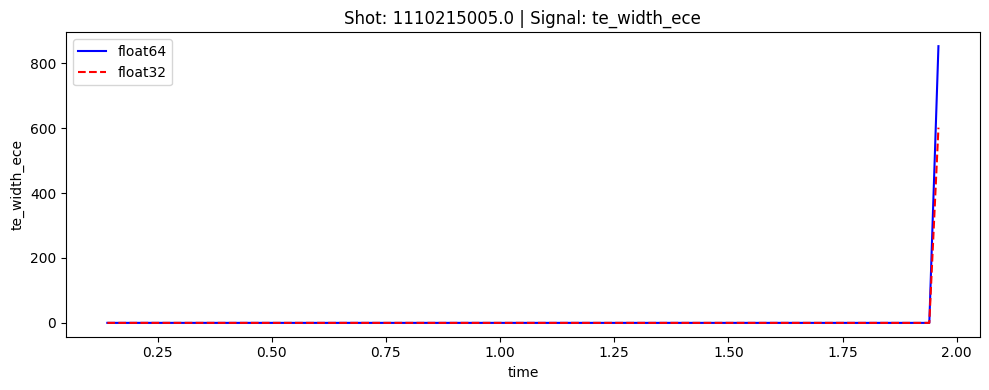

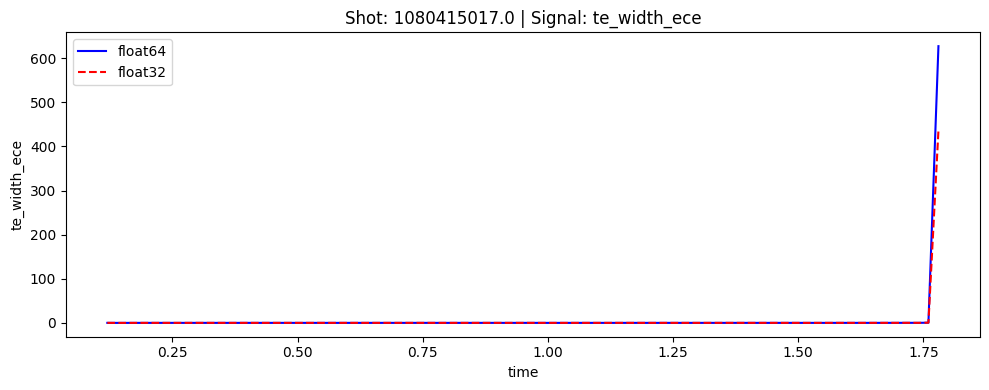

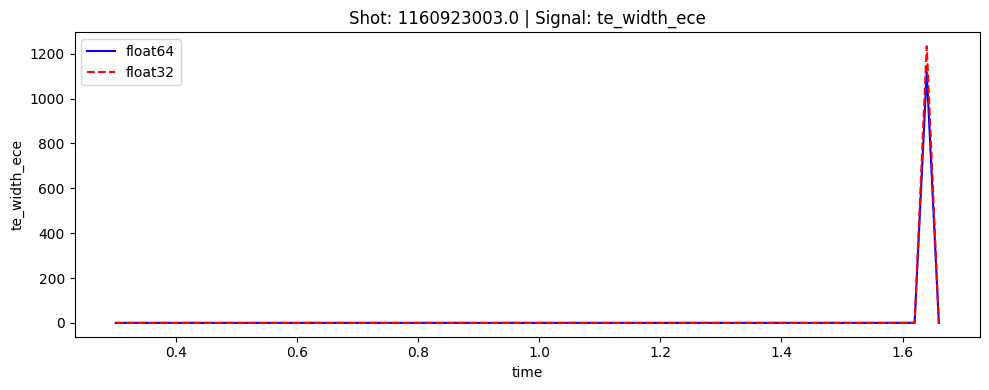

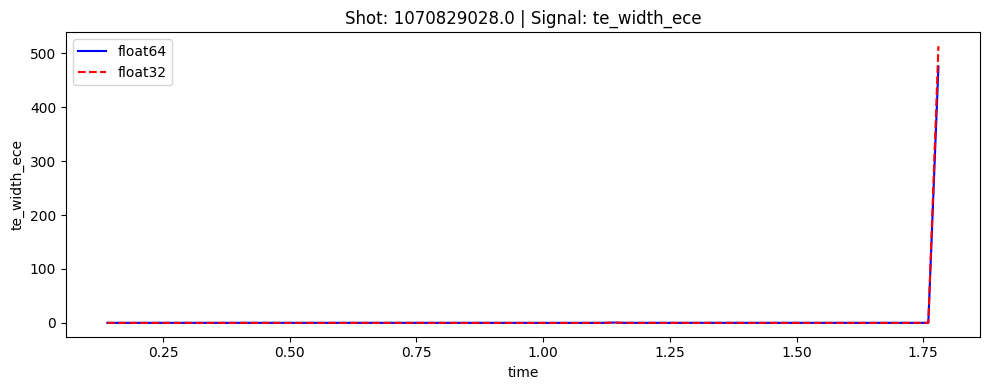

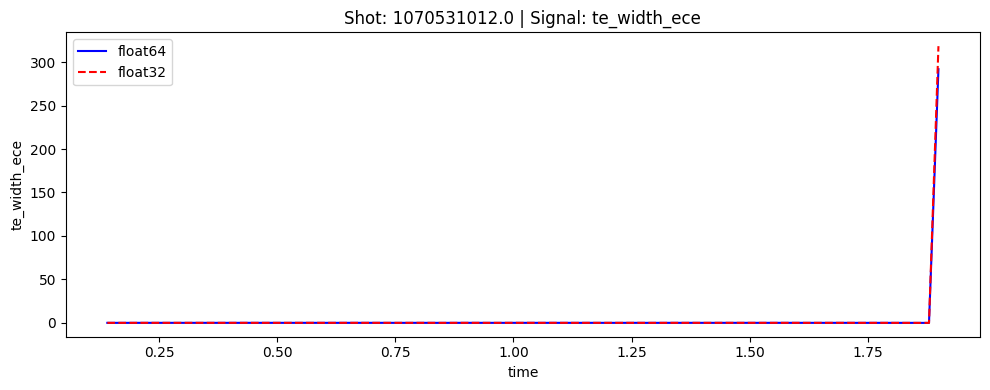

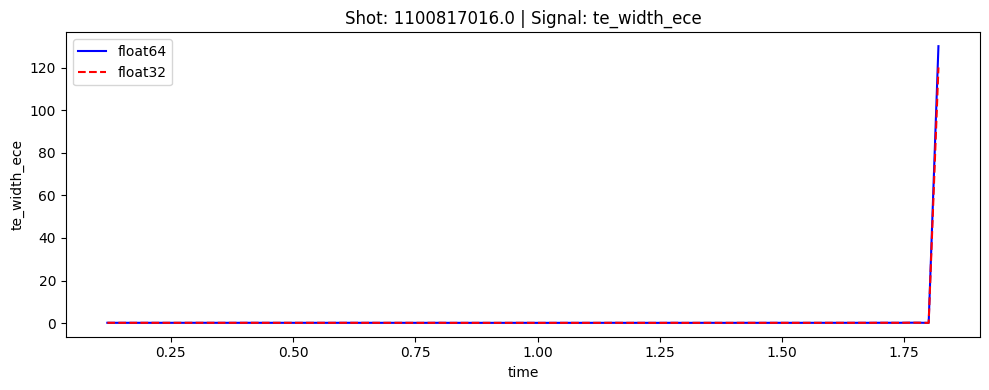

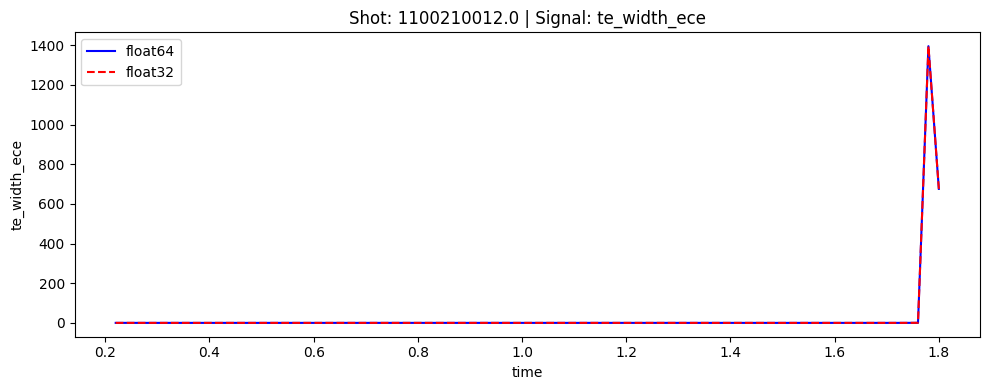

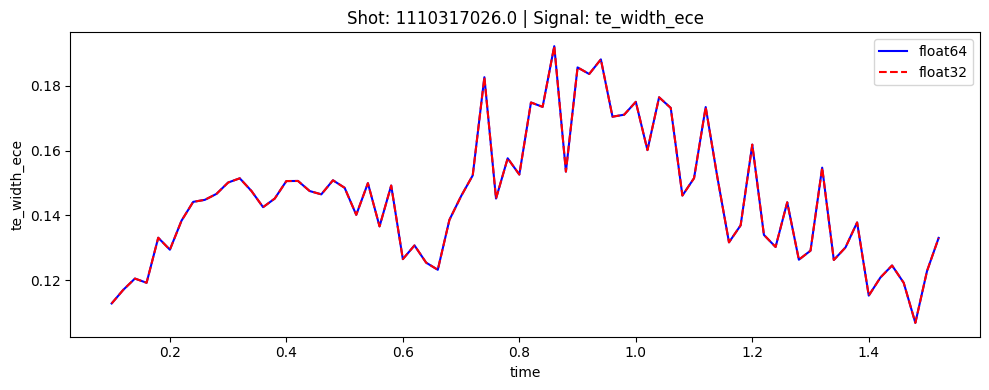

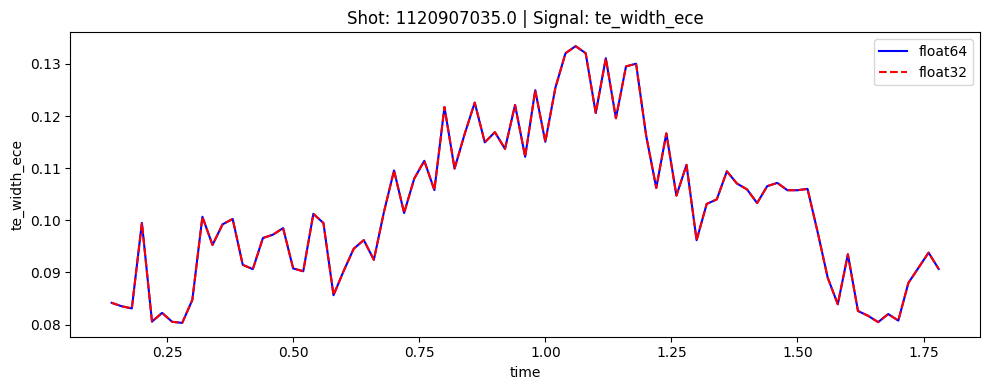

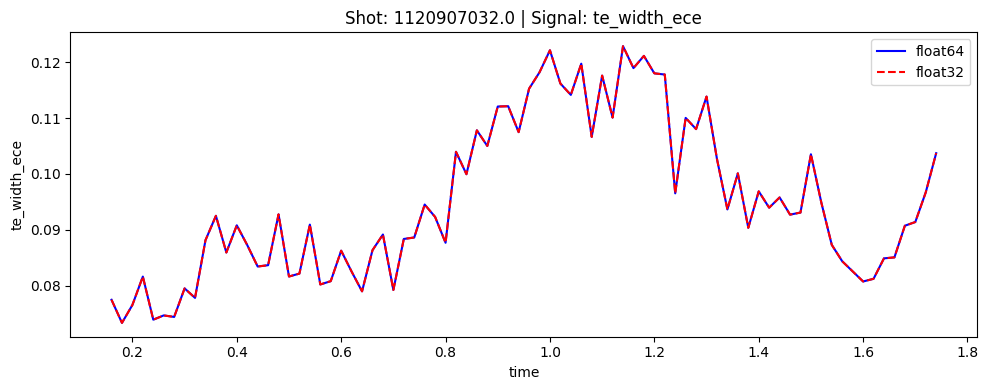

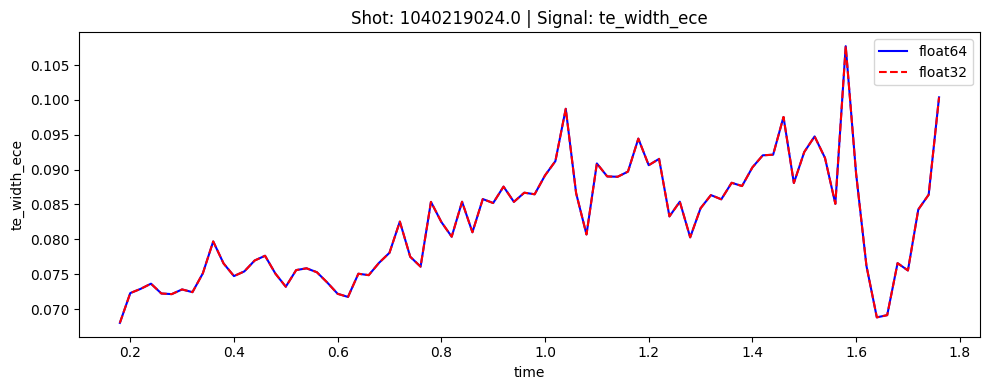

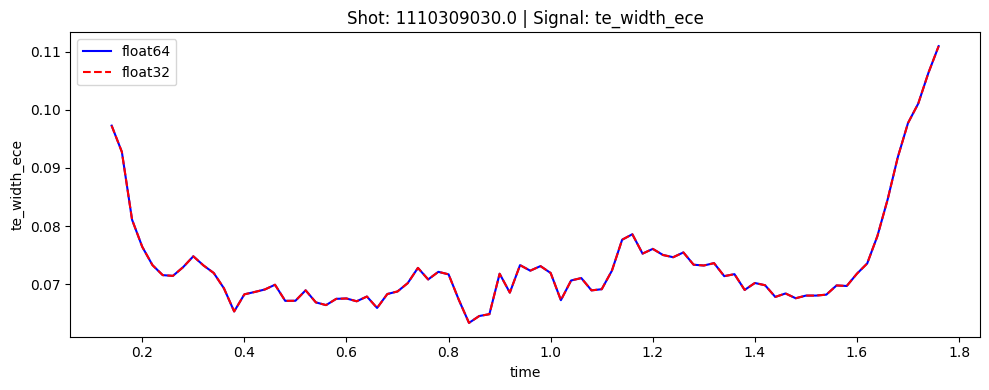

In [7]:
import matplotlib.pyplot as plt

for shot in shot_list[:20]:
    signal = 'te_width_ece'  # Change this to the signal you want to plot
    # Filter for the current shot
    df32_shot = df32[df32['shot'] == shot]
    df64_shot = df64[df64['shot'] == shot] 
    plt.figure(figsize=(10, 4))
    plt.plot(df64_shot['time'], df64_shot[signal], label='float64', color='b')
    plt.plot(df32_shot['time'], df32_shot[signal], label='float32', color='r', linestyle='--')
    # add an arrow to the plot indicating the maximum difference time
    # max_time = df32_shot.loc[row['row_index'], 'time']
    # max_value_32 = df32_shot.loc[row['row_index'], signal]
    # max_value_64 = df64_shot.loc[row['row_index'], signal]
    # plt.annotate('Max Diff', xy=(max_time, max_value_32), xytext=(max_time + 0.1*max_time, max_value_32 + 0.1*max_value_32),
                #  arrowprops=dict(facecolor='black', arrowstyle='->'))
    # plt.title(f"Shot: {shot} | Signal: {signal} | Max Diff: {row['absolute_difference']:.6f} | Rel Diff 64-32 : {row['relative_difference_64_percent']:.6f} %")
    plt.title(f"Shot: {shot} | Signal: {signal}")
    plt.xlabel('time')
    plt.ylabel(signal)
    plt.legend()
    plt.tight_layout()
    plt.show()

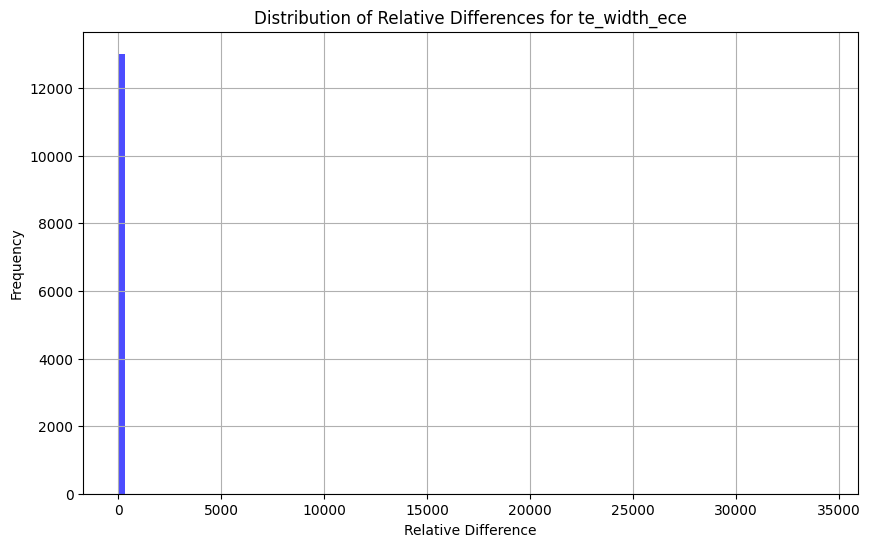

In [8]:
# compute the relative difference between df64 and df32
relative_diff = ((df64 - df32) / df32.abs()).abs()
# Plot the distribution of relative differences for the 'te_width_ece' signal
plt.figure(figsize=(10, 6))
plt.hist(relative_diff['te_width_ece'].dropna(), bins=100, color='blue', alpha=0.7)
plt.title('Distribution of Relative Differences for te_width_ece')
plt.xlabel('Relative Difference')
plt.ylabel('Frequency')
plt.grid()
plt.show()

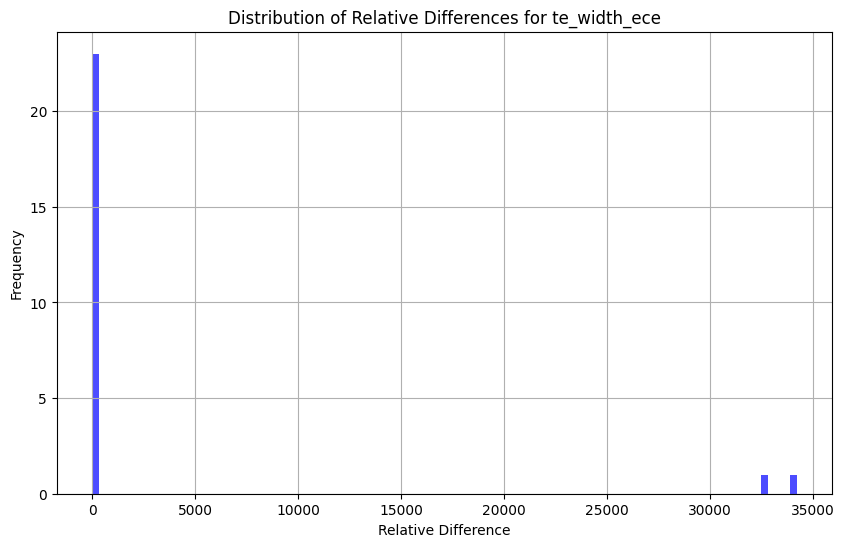

In [9]:
# compute the relative difference between df64 and df32
relative_diff = ((df64 - df32) / df32.abs()).abs()
# Filter relative_diff smallar than 0.1
relative_diff = relative_diff[relative_diff['te_width_ece'].abs() > 0.5]
# Plot the distribution of relative differences for the 'te_width_ece' signal
plt.figure(figsize=(10, 6))
plt.hist(relative_diff['te_width_ece'].dropna(), bins=100, color='blue', alpha=0.7)
plt.title('Distribution of Relative Differences for te_width_ece')
plt.xlabel('Relative Difference')
plt.ylabel('Frequency')
plt.grid()
plt.show()

These catastrophic errors are very infrequent

### Study te_widh 

In [10]:
# Drop 'shot' column from diff_abs
diff_abs = diff_abs.drop(columns=['shot'])
# Add 'shot' column back to diff_abs
diff_abs['shot'] = df32['shot']
# Order diff_abs by descending order in 'te_width_ece'
diff_abs_sorted_te_width_ece = diff_abs.sort_values(by='te_width', ascending=False)
diff_abs_sorted_te_width_ece[['shot','te_width']].head(10)

,shot,te_width
7168,1090914015.000000000000000000000000000000000000...,0.014681391406241001140742241659609135240316390...
7169,1090914015.000000000000000000000000000000000000...,0.000285312787862201933108963203267194330692291...
9769,1100210012.000000000000000000000000000000000000...,0.000003163452966803426136266352841630578041076...
7608,1091016029.000000000000000000000000000000000000...,0.000002274632268706167081973035237751901149749...
13425,1110316005.000000000000000000000000000000000000...,0.000001456990338211117119726623059250414371490...
12254,1110215010.000000000000000000000000000000000000...,0.000001436082232186830509590436122380197048187...
13290,1110309032.000000000000000000000000000000000000...,0.000001419635627192272764318659028504043817520...
16696,1160826012.000000000000000000000000000000000000...,0.000001230229293297524506556328560691326856613...
16522,1160803022.000000000000000000000000000000000000...,0.000001030224876713559112317852850537747144699...
12285,1110215010.000000000000000000000000000000000000...,0.000001017797249813767734849534463137388229370...


In [11]:
# get shot list from diff_abs_sorted_te_width_ece
shot_list = diff_abs_sorted_te_width_ece['shot'].tolist()
# remove duplicates keeping the first occurrence
shot_list = list(dict.fromkeys(shot_list))

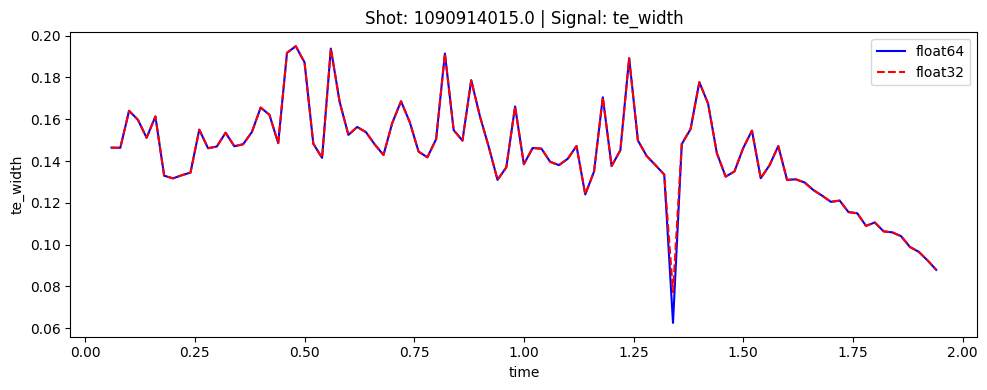

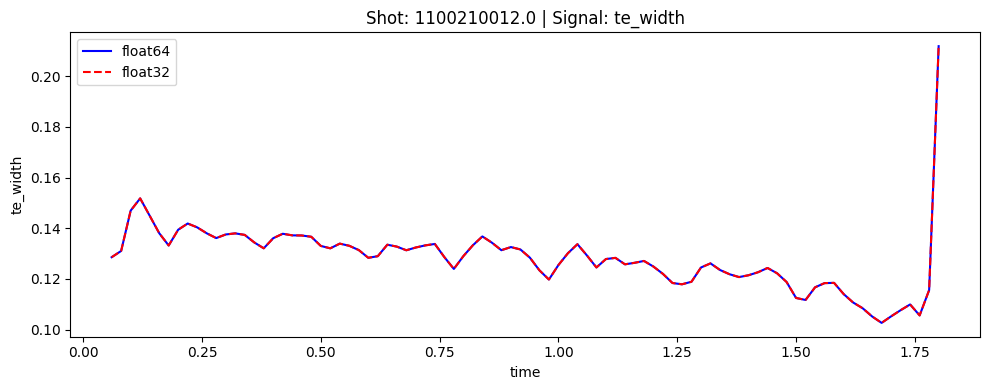

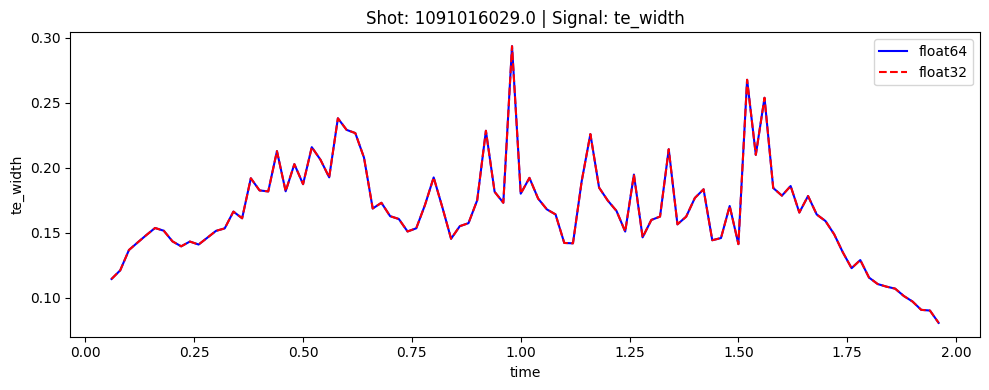

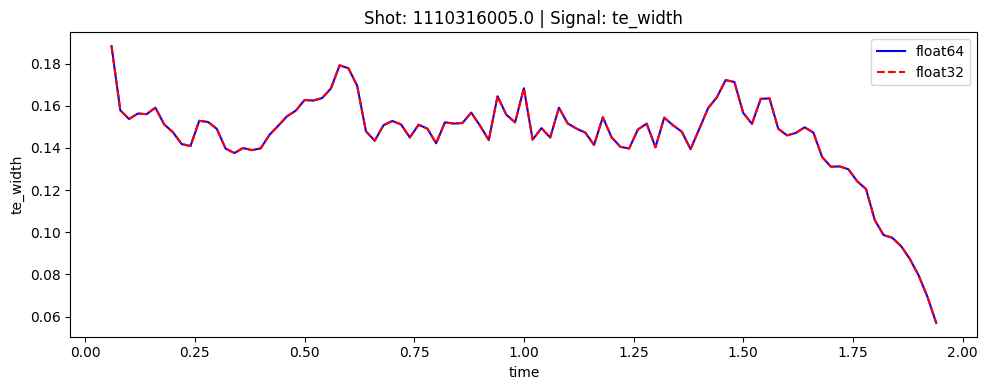

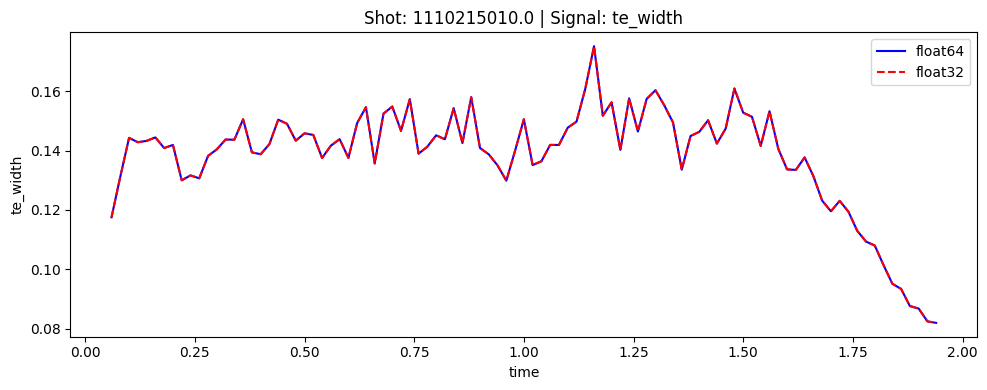

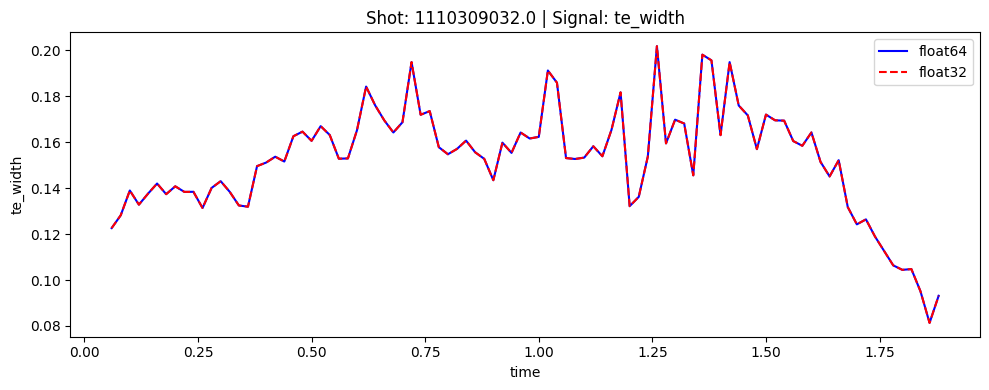

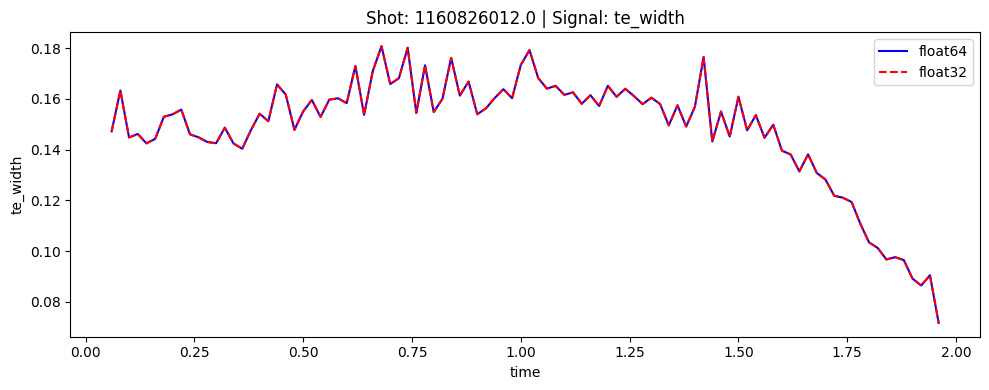

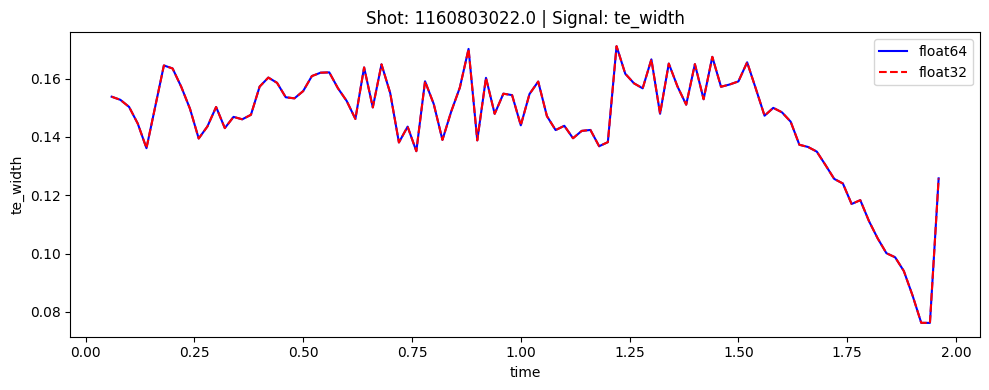

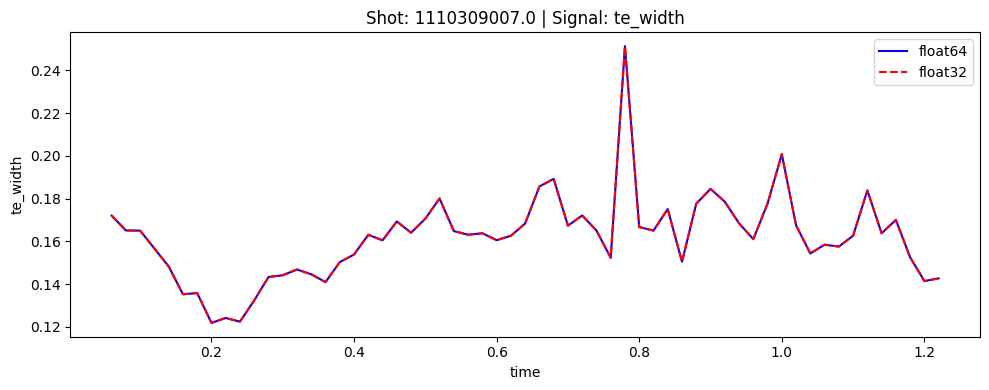

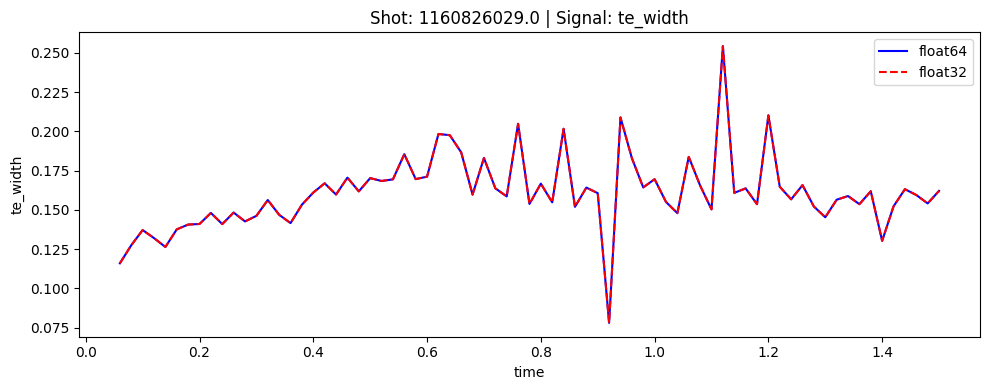

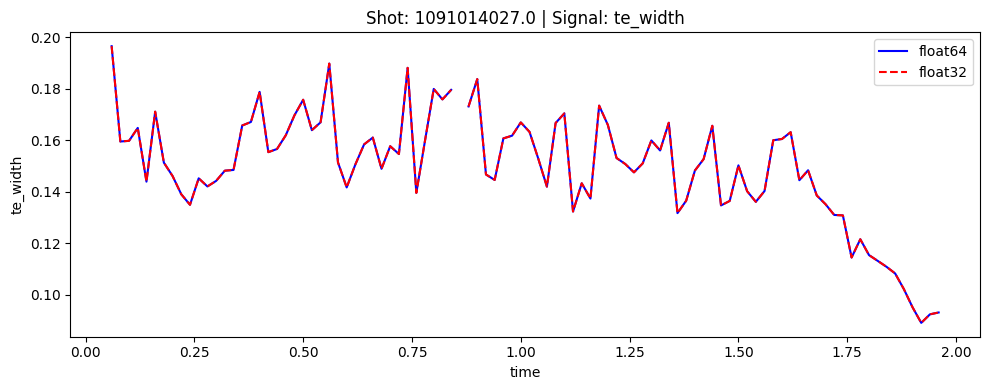

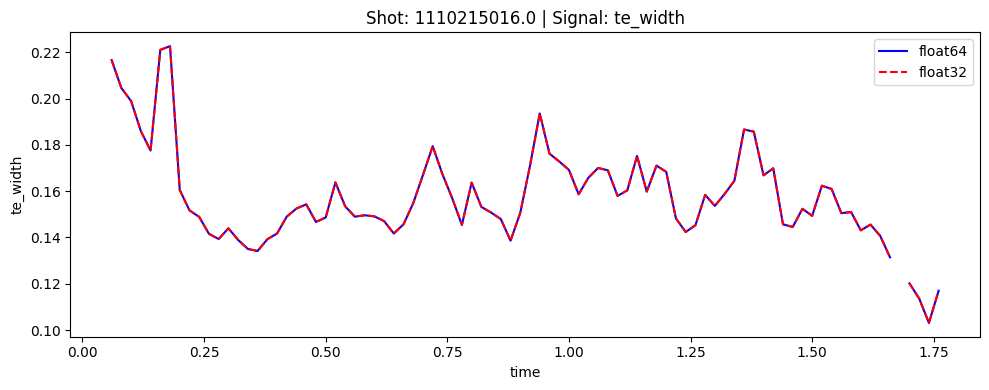

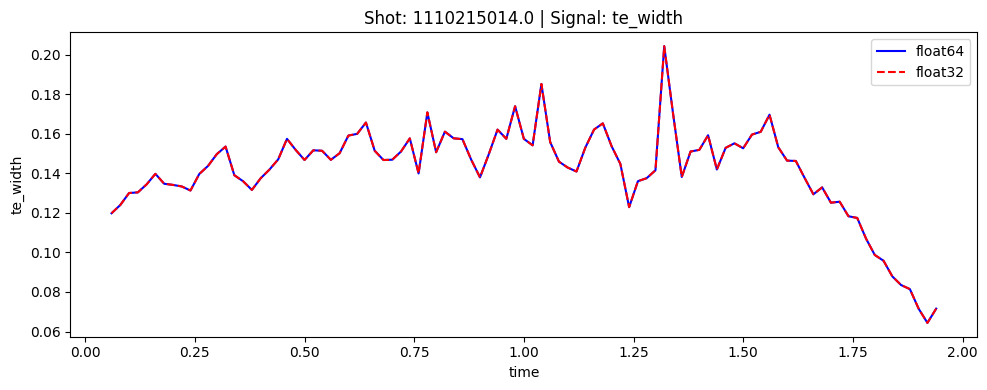

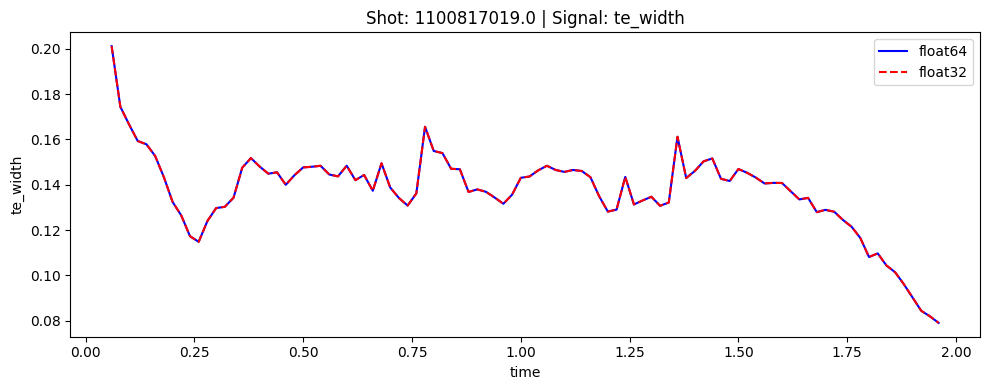

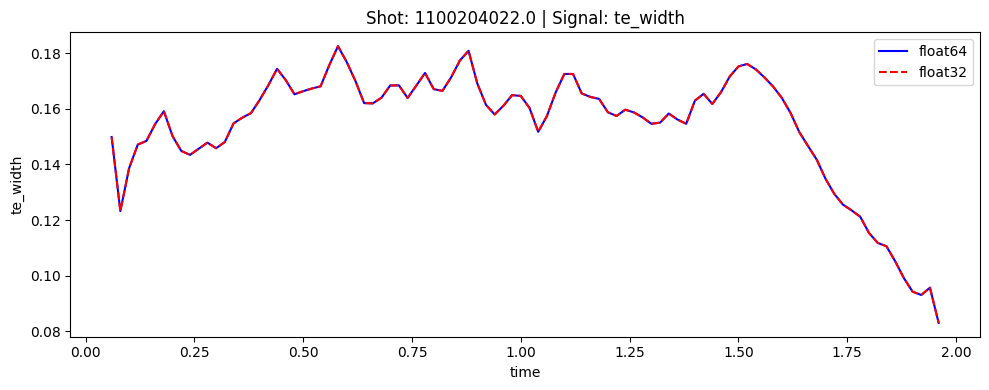

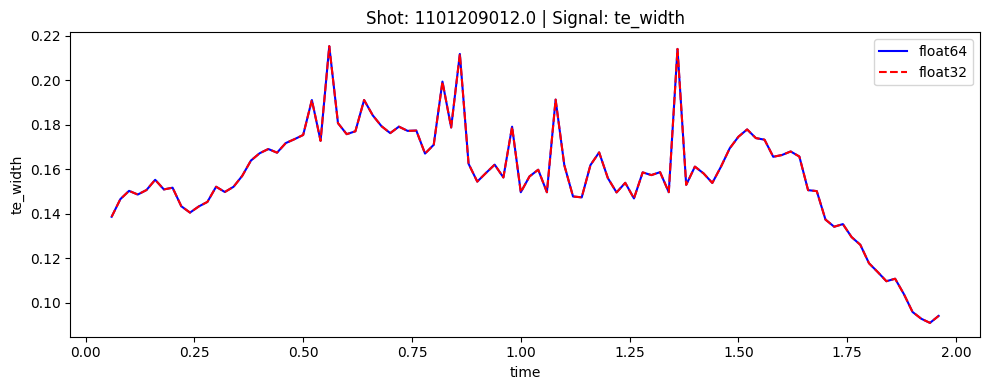

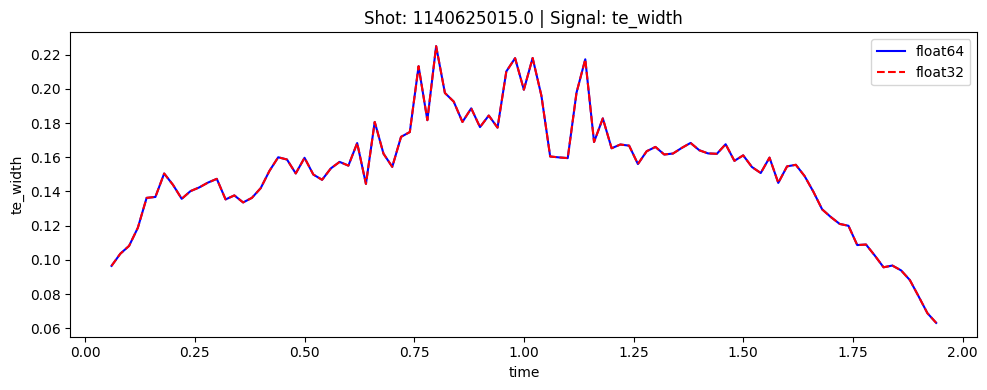

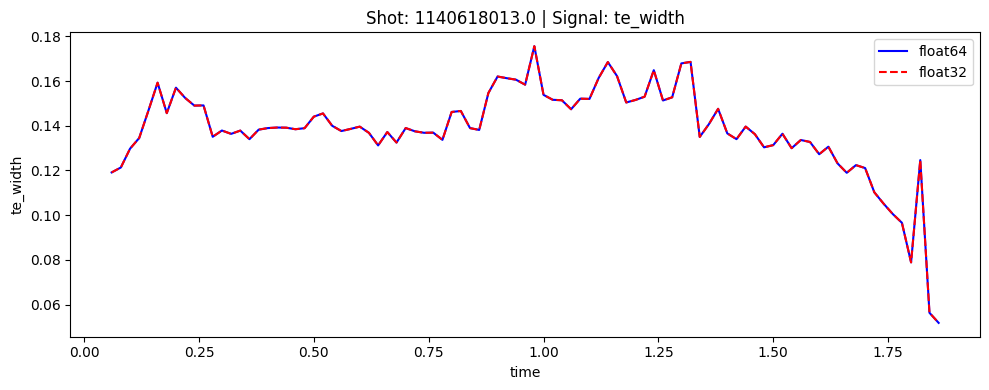

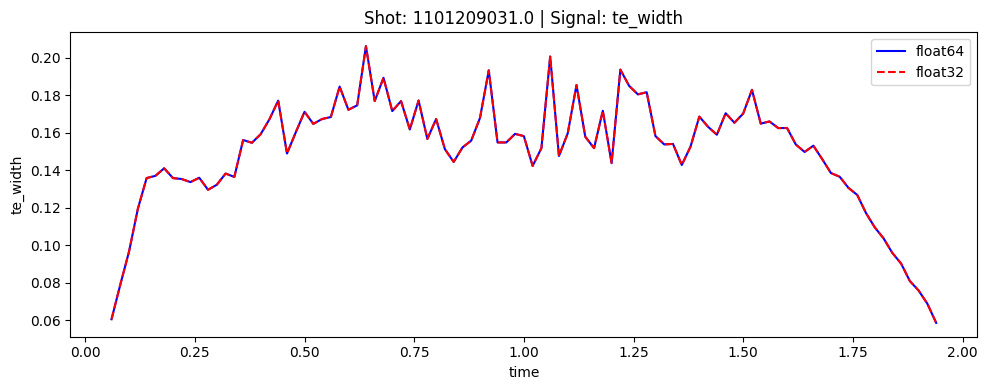

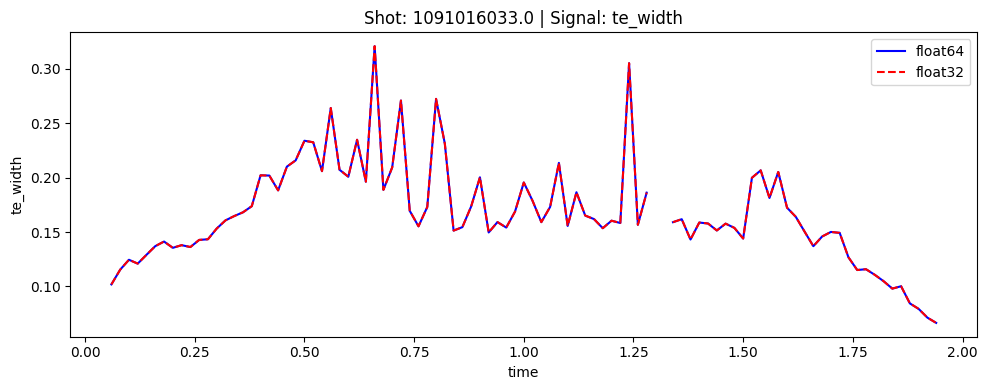

In [12]:
import matplotlib.pyplot as plt

for shot in shot_list[:20]:
    signal = 'te_width'  # Change this to the signal you want to plot
    # Filter for the current shot
    df32_shot = df32[df32['shot'] == shot]
    df64_shot = df64[df64['shot'] == shot] 
    plt.figure(figsize=(10, 4))
    plt.plot(df64_shot['time'], df64_shot[signal], label='float64', color='b')
    plt.plot(df32_shot['time'], df32_shot[signal], label='float32', color='r', linestyle='--')
    # add an arrow to the plot indicating the maximum difference time
    # max_time = df32_shot.loc[row['row_index'], 'time']
    # max_value_32 = df32_shot.loc[row['row_index'], signal]
    # max_value_64 = df64_shot.loc[row['row_index'], signal]
    # plt.annotate('Max Diff', xy=(max_time, max_value_32), xytext=(max_time + 0.1*max_time, max_value_32 + 0.1*max_value_32),
                #  arrowprops=dict(facecolor='black', arrowstyle='->'))
    # plt.title(f"Shot: {shot} | Signal: {signal} | Max Diff: {row['absolute_difference']:.6f} | Rel Diff 64-32 : {row['relative_difference_64_percent']:.6f} %")
    plt.title(f"Shot: {shot} | Signal: {signal}")
    plt.xlabel('time')
    plt.ylabel(signal)
    plt.legend()
    plt.tight_layout()
    plt.show()

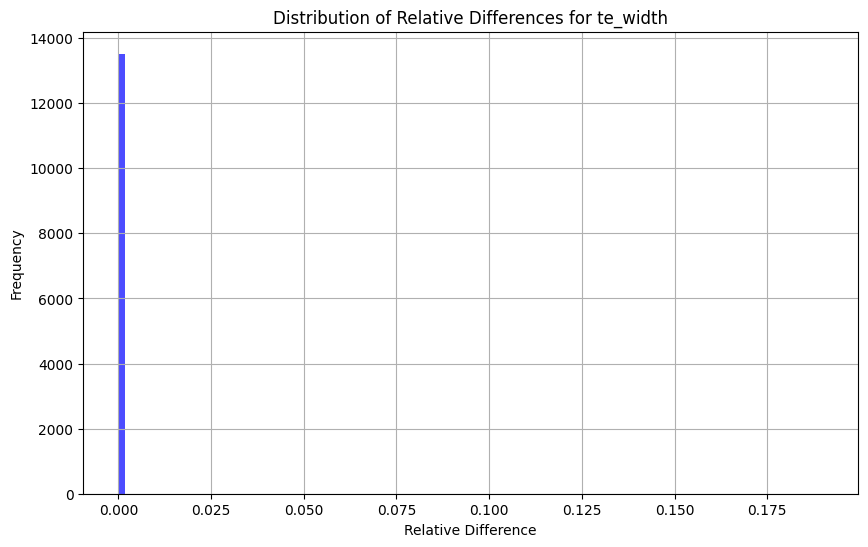

In [13]:
# compute the relative difference between df64 and df32
relative_diff = ((df64 - df32) / df32.abs()).abs()
# Plot the distribution of relative differences for the 'te_width_ece' signal
plt.figure(figsize=(10, 6))
plt.hist(relative_diff['te_width'].dropna(), bins=100, color='blue', alpha=0.7)
plt.title('Distribution of Relative Differences for te_width')
plt.xlabel('Relative Difference')
plt.ylabel('Frequency')
plt.grid()
plt.show()

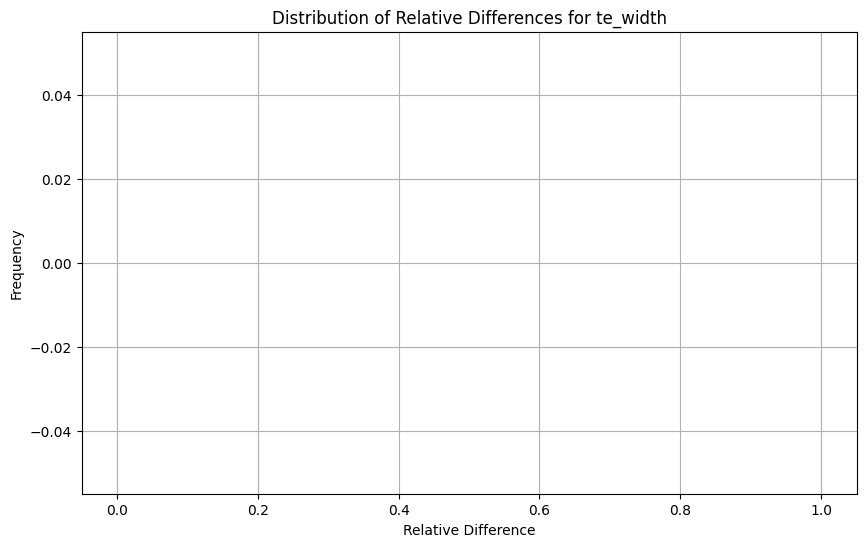

In [14]:
# compute the relative difference between df64 and df32
relative_diff = ((df64 - df32) / df32.abs()).abs()
# Filter relative_diff smallar than 0.1
relative_diff = relative_diff[relative_diff['te_width'].abs() > 0.5]
# Plot the distribution of relative differences for the 'te_width_ece' signal
plt.figure(figsize=(10, 6))
plt.hist(relative_diff['te_width_ece'].dropna(), bins=100, color='blue', alpha=0.7)
plt.title('Distribution of Relative Differences for te_width')
plt.xlabel('Relative Difference')
plt.ylabel('Frequency')
plt.grid()
plt.show()